In [10]:
import EulerMethod
epsion = 0.4
kappa = 0.5
tho = -0.05
T = 2
timeStep = 0.001
V0 = 0.04
theta = 0.04
S0 = 8.29
(V_dyn, S_dyn) = EulerMethod.HestonEuler(epsion, kappa, tho, T, theta, V0, S0, timeStep)

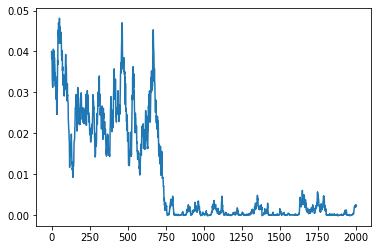

In [9]:
import matplotlib.pyplot as plt
plt.plot(V_dyn)

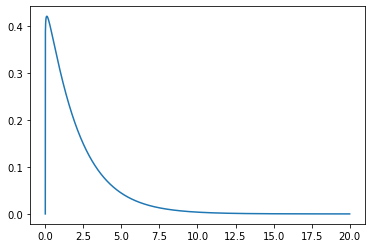

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
x = np.arange(0, 20, 0.001)

#plot Chi-square distribution with 4 degrees of freedom
plt.plot(x, chi2.pdf(x, df=2.1))

In [21]:
## Create TG Grid
import TGMethodGrid
alpha = 4
start = 1/16
end = 14
(result, space) = TGMethodGrid.TG_map(start, end, 10000)

In [22]:
save_result = np.array([space, result])
save_result = np.transpose(save_result)
np.savetxt("/Users/zhiwang/Desktop/STAT906/Code/ResearchPaper/grid.csv",save_result)

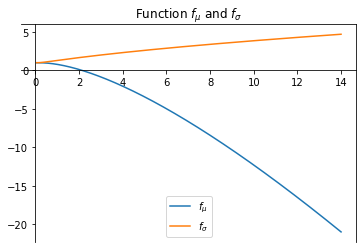

In [39]:
import pylab
mean = TGMethodGrid.TG_mean(result)
var = TGMethodGrid.TG_var(result, space)
from matplotlib import pyplot as plt
fig, ax = plt.subplots(1, 1)
ax.plot(space, mean, label = r"$f_\mu$")
ax.plot(space, var,  label = r"$f_\sigma$")
ax.legend(loc='lower center')
ax.set_title(r"Function $f_\mu$ and $f_\sigma$")
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))

In [12]:
import numpy as np
from numericalHesnton import TGHeston, QEHeston, EulerHeston
epsion = 0.4
kappa = 0.5
theta = 0.04
T = 2
timeStep = 1000
rho = -0.3
V0 = 0.04
S0 = 4900
grid = np.genfromtxt('/Users/zhiwang/Desktop/STAT906/Code/ResearchPaper/grid.csv')
swtiching_rule = 1.5
myHestonTG = TGHeston(kappa,theta,epsion,rho,grid)
myHentonQE = QEHeston(kappa, theta, epsion,rho, 1.5)
myHestonEuler = EulerHeston(kappa, theta, epsion, rho)

# (result_asset_QE, result_var_QE) = myHentonQE.simulateAssetPath(T,V0,np.log(S0),timeStep,1000)
# (result_asset_TG, result_var_TG) = myHestonTG.simulateAssetPath(T,V0,np.log(S0),timeStep,1000)
# (result_asset_Euler, result_var_Euler) = myHestonEuler.simulateAssetPath(T,V0,np.log(S0),timeStep,1000)



In [2]:
## At the money call
call_QE = np.mean(np.maximum(np.exp(result_asset_QE[:,-1]) - 4900, 0))
call_Euler = np.mean(np.maximum(np.exp(result_asset_Euler[:,-1]) - 4900, 0))
call_TG = np.mean(np.maximum(np.exp(result_asset_TG[:,-1]) - 4900, 0))
print(call_Euler)
print(call_TG)
CMC = myHentonQE.callOptionPriceFromCMC(T,V0, np.log(S0), timeStep, 10000, S0,0)
print(np.mean(CMC))
#print(np.mean(np.exp(result_asset_Euler[:,-1])))
#print(np.mean(np.exp(result_asset_QE[:,-1])))
#print(np.mean(np.exp(result_asset_TG[:,-1])))

532.9514944238967
468.99759948490816
472.414083932521


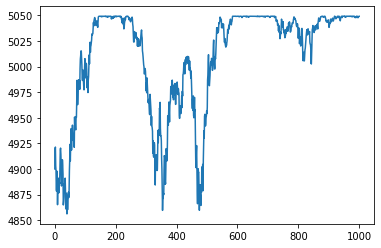

In [28]:
import matplotlib.pyplot as plt
plt.plot(np.exp(result_asset[30]))

In [2]:
swtiching_rule = 1.5
myHentonQE = QEHeston(kappa, theta, epsion, 1.5)
my_result_QE = myHentonQE.sampleVariancePath(T,V0,timeStep,100)

In [16]:
from scipy.integrate import quad
def call_price(kappa, theta, sigma, rho, v0 ,r ,T ,s0 ,K):
    p1 = __p1(kappa, theta, sigma, rho, v0 ,r ,T ,s0 ,K)
    p2 = __p2(kappa, theta, sigma, rho, v0 ,r ,T ,s0 ,K)
    return (s0 * p1 - K * np.exp(-r * T) * p2)

#private
def __p(kappa, theta, sigma, rho, v0 ,r ,T ,s0 , K, status):
    integrand = lambda phi: (np.exp(-1j * phi * np.log(K)) * 
    __f(phi, kappa, theta, sigma, rho, v0, r, T, s0, status) / (1j * phi)).real    
    return (0.5 + (1 / np.pi) * quad(integrand, 0, 100)[0])
def __p1(kappa, theta, sigma, rho, v0 ,r ,T ,s0 ,K):
    return __p(kappa, theta, sigma, rho, v0 ,r ,T ,s0 ,K, 1)
def __p2(kappa, theta, sigma, rho, v0 ,r ,T ,s0 ,K):
    return __p(kappa, theta, sigma, rho, v0 ,r ,T ,s0 ,K, 2)
def __f(phi, kappa, theta, sigma, rho, v0, r, T, s0, status):
        
    if status == 1:
        u = 0.5
        b = kappa - rho * sigma
    else:
        u = -0.5
        b = kappa
    
    a = kappa * theta
    x = np.log(s0)
    d = np.sqrt((rho * sigma * phi * 1j - b)**2 - sigma**2 * (2 * u * phi * 1j - phi**2))
    g = (b - rho * sigma * phi * 1j + d) / (b - rho * sigma * phi * 1j - d)
    C = r * phi * 1j * T + (a / sigma**2)*((b - rho * sigma * phi * 1j + d) * T - 2 * np.log((1 - g * np.exp(d * T))/(1 - g)))
    D = (b - rho * sigma * phi * 1j + d) / sigma**2 * ((1 - np.exp(d * T)) / (1 - g * np.exp(d * T)))
    return np.exp(C + D * v0 + 1j * phi * x)
call_price(kappa, theta, epsion, rho, V0 ,0 ,T ,S0 ,5100)

378.54912906764594

Text(0.5, 1.0, 'Central chi-suqared pdf')

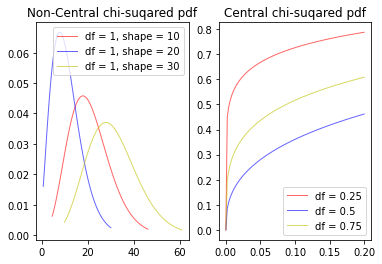

In [20]:
## Non-central chi-squred distribution, visulize plot 
from scipy.stats import ncx2
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2)

df1, nc1 = 1, 20
x = np.linspace(ncx2.ppf(0.01, df1, nc1),
                ncx2.ppf(0.99, df1, nc1), 100)
ax1.plot(x, ncx2.pdf(x, df1, nc1),
       'r-', lw=1, alpha=0.6, label='df = 1, shape = 10')

df2, nc2 = 1, 10
x = np.linspace(ncx2.ppf(0.01, df2, nc2),
                ncx2.ppf(0.99, df2, nc2), 100)
ax1.plot(x, ncx2.pdf(x, df2, nc2),
       'b-', lw=1, alpha=0.6, label='df = 1, shape = 20')

df3, nc3 = 1, 30
x = np.linspace(ncx2.ppf(0.01, df3, nc3),
                ncx2.ppf(0.99, df3, nc3), 100)
ax1.plot(x, ncx2.pdf(x, df3, nc3),
       'y-', lw=1, alpha=0.6, label='df = 1, shape = 30')
ax1.legend(loc='best')
ax1.set_title("Non-Central chi-suqared pdf")

from scipy.stats import chi2

df1_chi = 0.25
df2_chi = 0.5
df3_chi = 0.75

x = np.linspace(0,0.2, 100)
ax2.plot(x, chi2.cdf(x, df1_chi),
       'r-', lw=1, alpha=0.6, label='df = 0.25')
ax2.plot(x, chi2.cdf(x, df3_chi),
       'b-', lw=1, alpha=0.6, label='df = 0.5')
ax2.plot(x, chi2.cdf(x, df2_chi),
       'y-', lw=1, alpha=0.6, label='df = 0.75')
ax2.legend(loc='best')
ax2.set_title("Central chi-suqared cdf")